In [1]:
!pip install cx_Oracle

     -------------------------------------- 213.2/213.2 kB 4.3 MB/s eta 0:00:00


In [2]:
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select *from DEMO')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'DEMO'")
col = cursor.fetchall()
list1 = []
for i in col :
    for j in i:
        list1.append(j)
df.columns = list1
df.head()

,고객번호,성별,연령대,거주지역
0,00501,F,60세이상,460
1,00502,F,60세이상,060
2,00503,F,60세이상,055
3,00504,F,60세이상,049
4,00505,F,60세이상,055


In [11]:
col

[('고객번호',), ('성별',), ('연령대',), ('거주지역',)]

In [15]:
df_lm = pd.read_csv('df_lm.csv', index_col = 0)
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0
2,3,851215,1042554,592280,679118,M,60세이상,33.0
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0


In [30]:
# h1 대비 h4간의 구매감소 고객의 비중을 구하세요

len(df_lm[df_lm.H4 < df_lm.H1])/len(df_lm)

0.4273332301501316

In [40]:
# h1 대비 h4간 고객별 성장율 컬럼을 추가하세요

df_lm['h1 대비 h4간 성장률'] = ((df_lm.H4 - df_lm.H1) / df_lm.H1)

df_lm

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,h1 대비 h4간 성장률
0,1.0,19925355.0,34116312.0,17898365.0,13102518.0,M,60세이상,60.0,-0.342420
1,2.0,24323230.0,21922100.0,27791610.0,25843820.0,M,60세이상,100.0,0.062516
2,3.0,851215.0,1042554.0,592280.0,679118.0,M,60세이상,33.0,-0.202178
3,4.0,5042106.0,4257510.0,3656937.0,3737257.0,F,60세이상,16.0,-0.258790
4,5.0,5460150.0,2225730.0,2934930.0,2616260.0,M,60세이상,100.0,-0.520845
...,...,...,...,...,...,...,...,...,...
19378,19379.0,0.0,1190620.0,2395920.0,2192740.0,F,20세~24세,69.0,inf
19379,19380.0,0.0,522700.0,837950.0,2552327.0,F,20세~24세,39.0,inf
19380,19381.0,0.0,0.0,2797171.0,3243498.0,F,40세~44세,460.0,inf
19381,19382.0,0.0,0.0,1826739.0,2575034.0,F,45세~49세,460.0,inf


CAGR(Compound Annual Growth Rate)
- 연복리 성장률을 나타내는 지표
- 주어진 기간 동안의 성장률을 하나의 수치로 요약하여 비교 및 분석에 용이
- 장점은 단순 평균 수익률보다 정확한 성장률을 제공하고, 시간에 따른 변동성을 고려하여 성장률을 측정
- 한계는 특정기간 동안의 평균 성장률을 알려주지만, 성장률의 변동성이나 시계열 데이터의 패턴은 미 반영
- 변동성이나 패턴을 반영하는 지표는 표준편차, 변동계수, 이동평균, 지수 이동평균, 상대강도지수 등이 있음
- CAGR = (최종 가치 / 초기 가치) ^ (1 / 기간) - 1

In [45]:
# cagr 연평균 복리 성장률

df_lm['cagr'] =  (df_lm.H4 / df_lm.H1) ** (1 / 4)- 1

df_lm

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,h1 대비 h4간 성장률,cagr
0,1.0,19925355.0,34116312.0,17898365.0,13102518.0,M,60세이상,60.0,-0.342420,-0.099493
1,2.0,24323230.0,21922100.0,27791610.0,25843820.0,M,60세이상,100.0,0.062516,0.015275
2,3.0,851215.0,1042554.0,592280.0,679118.0,M,60세이상,33.0,-0.202178,-0.054903
3,4.0,5042106.0,4257510.0,3656937.0,3737257.0,F,60세이상,16.0,-0.258790,-0.072134
4,5.0,5460150.0,2225730.0,2934930.0,2616260.0,M,60세이상,100.0,-0.520845,-0.168008
...,...,...,...,...,...,...,...,...,...,...
19378,19379.0,0.0,1190620.0,2395920.0,2192740.0,F,20세~24세,69.0,inf,inf
19379,19380.0,0.0,522700.0,837950.0,2552327.0,F,20세~24세,39.0,inf,inf
19380,19381.0,0.0,0.0,2797171.0,3243498.0,F,40세~44세,460.0,inf,inf
19381,19382.0,0.0,0.0,1826739.0,2575034.0,F,45세~49세,460.0,inf,inf


In [46]:
# h1대비 h4 간의 cagr 기준으로 구매감소 고객의 비중을 구하세요

len(df_lm[df_lm.cagr < 0]) / len(df_lm)

0.4273332301501316

In [47]:
df_lm.cagr.describe()

count    1.937600e+04
mean              inf
std               NaN
min     -1.000000e+00
25%     -5.843754e-02
50%      2.197862e-02
75%      1.144139e-01
max               inf
Name: cagr, dtype: float64

### 과제 2 과제 1에서 작성한 테이블을 주피터로 불러오세요

In [3]:
# 분기별_연도차이
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select *from 분기별_연도차이')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = '분기별_연도차이'")
col = cursor.fetchall()
list1 = []
for i in col :
    for j in i:
        list1.append(j)
df.columns = list1
df.head()

,제휴사,1분기_차이,2분기_차이,3분기_차이,4분기_차이
0,A,5790763720,4305666600,3779226950,2750066360
1,B,199805032,-671518349,54657389,-1103127776
2,C,680039170,577038902,689524753,492381692
3,D,89105290,77519640,63427251,40899155


In [4]:
# B대분류_연도차이
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select *from B대분류_연도차이')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'B대분류_연도차이'")
col = cursor.fetchall()
list1 = []
for i in col :
    for j in i:
        list1.append(j)
df.columns = list1
df.head()

,제휴사,대분류코드,B_1분기차이,B_2분기차이,B_3분기차이,B_4분기차이,B금액_1분기차이,B금액_2분기차이,B금액_3분기차이,B금액_4분기차이,총금액차이
0,B,1,55542,72332,68968,4471,158054166,158199483,161839917,12723270,490816836
1,B,2,4844,3979,4442,-1252,48335523,38511822,41604600,-11461634,116990311
2,B,3,7565,7886,6988,-6726,27086930,25745090,22890580,-25769812,49952788
3,B,4,-6028,-6708,-6811,-427,-209614977,-266838620,-140837186,-48149550,-665440333
4,B,5,-56669,-59396,-60190,4103,-145420236,-147511823,-176472646,-7859385,-477264090


In [5]:
# 중분류차이
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select *from 중분류차이')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = '중분류차이'")
col = cursor.fetchall()
list1 = []
for i in col :
    for j in i:
        list1.append(j)
df.columns = list1
df.head()

,대분류코드,중분류코드,중분류명,중_1분기차이,중_2분기차이,중_3분기차이,중_4분기차이,중_총금액차이
0,4,0401,양곡,-85734870,-149998460,191,-502,-316689736
1,4,0402,잡곡류,-118111677,-111446460,-7022,0,-327062717
2,4,0403,즉석도정미,-9982570,-5399180,115,35,-26257640
3,5,0501,잎채소,48489297,51850780,16417,-1947,128976296
4,5,0502,뿌리채소,-59453614,-61165540,-18136,0,-180349311


### 과제3 employees 테이블을 불러와서 다음사항을 수행하세요

- 컬럼명을 포함하여 employees 테이블을 데이터 프레임으로 출력
- department_id 별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 표현

In [6]:
db = cx_Oracle.connect('c##hmkd1', 'hmkd1', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select *from EMPLOYEES')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'EMPLOYEES'")
col = cursor.fetchall()
list1 = []
for i in col :
    for j in i:
        list1.append(j)
df.columns = list1
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


In [12]:
salary_avg = df.groupby('DEPARTMENT_ID')['SALARY'].mean().reset_index()

round(salary_avg, 2)

,DEPARTMENT_ID,SALARY
0,10.0,4400.00
1,20.0,9500.00
2,30.0,4150.00
3,40.0,6500.00
4,50.0,3475.56
5,60.0,5760.00
6,70.0,10000.00
7,80.0,8955.88
8,90.0,19333.33
9,100.0,8601.33


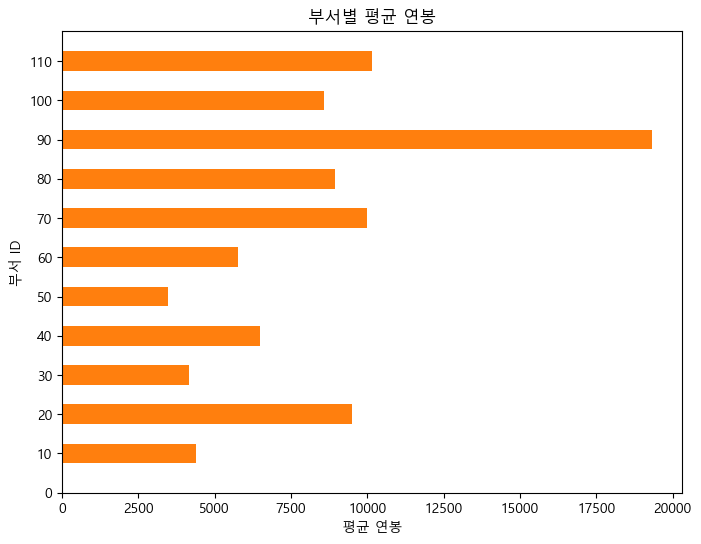

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family = 'Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (8, 6))

plt.barh(salary_avg.index, salary_avg.values, height = 5, color = 'C1')
plt.xlabel('평균 연봉')
plt.ylabel('부서 ID')
plt.yticks(range(0, 111, 10))
plt.title('부서별 평균 연봉')
plt.show()

### 과제4  과제 2에서 불러온 데이터 프레임을 탐색하여 통계적 시각적으로 인사이트를 도출하세요